Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-8-ae83042dbc3d>:37: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_pos, y_pos)  # Memperbarui posisi bola merah
<ipython-input-8-ae83042dbc3d>:37: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_pos, y_pos)  # Memperbarui posisi bola merah


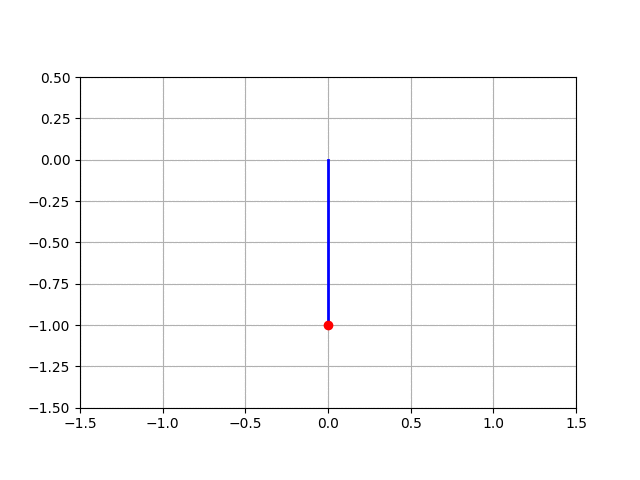

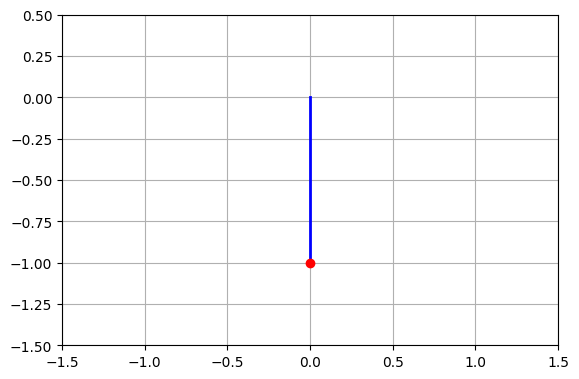

In [8]:
# Instal 'imagemagick' untuk menyimpan animasi sebagai GIF di Google Colab
!apt-get install -y imagemagick

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Setup plot
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 0.5)
ax.set_aspect('equal')
ax.grid(True)

# Membuat elemen animasi
line, = ax.plot([], [], 'b-', lw=2)  # Tali pendulum
point, = ax.plot([], [], 'ro')  # Titik bola merah

# Panjang tali dan batas x
L = 1
x_min, x_max = -0.75, 0.75

# Fungsi untuk mendapatkan posisi (x, y) bola
def get_pendulum_position(x):
    y = -np.sqrt(L**2 - x**2)  # Menggunakan persamaan lingkaran untuk menghitung y
    return x, y

# Waktu untuk animasi
t = np.linspace(0, 2 * np.pi, 500)  # Waktu dari 0 hingga 2π
x_values = 0.75 * np.sin(t)  # Gerakan bolak-balik dari -0.75 hingga 0.75

# Fungsi untuk memperbarui frame animasi
def update(frame):
    x = x_values[frame]  # Mengambil nilai x dari array gerakan bolak-balik
    x_pos, y_pos = get_pendulum_position(x)  # Menghitung posisi y dari x
    line.set_data([0, x_pos], [0, y_pos])  # Memperbarui posisi tali
    point.set_data(x_pos, y_pos)  # Memperbarui posisi bola merah
    return line, point

# Membuat animasi
ani = FuncAnimation(fig, update, frames=len(t), interval=30, blit=True)

# Menyimpan animasi sebagai GIF ke direktori /content/
gif_path = '/content/pendulum_animation.gif'
ani.save(gif_path, writer='imagemagick')

# Menampilkan animasi di Google Colab
from IPython.display import Image
Image(filename=gif_path)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


<ipython-input-20-b49c8ceac659>:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[frame], y[frame])
<ipython-input-20-b49c8ceac659>:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[frame], y[frame])


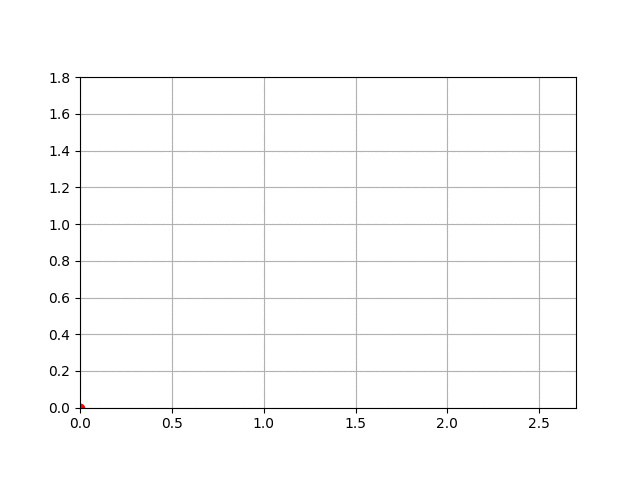

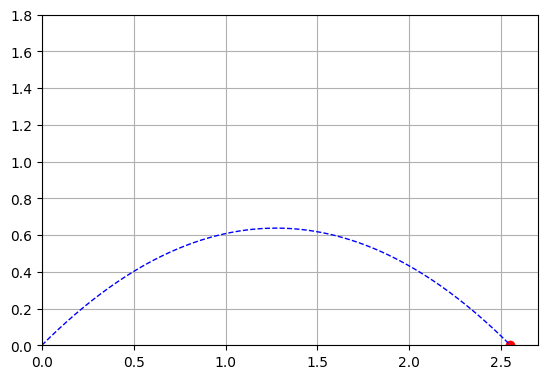

In [20]:
# Install 'imagemagick' untuk menyimpan animasi sebagai GIF di Google Colab
!apt-get install -y imagemagick

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameter fisika
g = 9.8  # Percepatan gravitasi (m/s^2)
v0 = 5   # Kecepatan awal (m/s)
theta = np.radians(45)  # Sudut tembak (dalam radian)

# Fungsi posisi bola dalam gerak parabola
def x_pos(t):
    return v0 * t * np.cos(theta)

def y_pos(t):
    return v0 * t * np.sin(theta) - 0.5 * g * t**2

# Waktu total saat bola mencapai tanah (y = 0)
t_flight = 2 * v0 * np.sin(theta) / g  # Durasi penerbangan
t = np.linspace(0, t_flight, 500)  # Waktu untuk simulasi

# Posisi x dan y dari bola
x = x_pos(t)
y = y_pos(t)

# Setup plot
fig, ax = plt.subplots()
ax.set_xlim(0, 2.7)
ax.set_ylim(0, 1.8)
ax.set_aspect('equal')
ax.grid(True)

# Elemen bola merah dan lintasan
point, = ax.plot([], [], 'ro')  # Bola merah
line, = ax.plot([], [], 'b--', lw=1)  # Lintasan parabola

# Fungsi untuk memperbarui animasi
def update(frame):
    # Memperbarui posisi bola dan lintasan
    point.set_data(x[frame], y[frame])
    line.set_data(x[:frame], y[:frame])
    return point, line

# Membuat animasi dengan loop terus-menerus
ani = FuncAnimation(fig, update, frames=len(t), interval=30, blit=True, repeat=True)

# Menyimpan animasi sebagai GIF ke direktori /content/
gif_path = '/content/parabola_animation.gif'
ani.save(gif_path, writer='imagemagick')

# Menampilkan animasi di Google Colab
from IPython.display import Image
Image(filename=gif_path)
